In [6]:
import os
import pickle
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
def read_from_pickle(path):
    output = None
    with open(path, 'rb') as file:
        try:
            while True:
                output =  pickle.load(file)
        except EOFError:
            pass
    return output

In [118]:
def multiseries_scatter_plot(y_list, labels, yaxis, title):
    fig = plt.figure(figsize=(4, 5), dpi=80)
    ax = fig.add_subplot(111)
    x = np.array([0, 100, 500, 1000, 5000])
    markers = ['bo', 'r^', 'o-']
    for i, y in enumerate(y_list):
#         ax.set_xscale('log')
        plt.plot(x, y, markers[i], label=labels[i])
#         plt.plot(x, y, linestyle='dotted', alpha=0.7)
        plt.ylabel(yaxis)
        plt.xlabel('no. labeled target samples')
    plt.legend()
    plt.tight_layout()
    plt.savefig(title + ".png")

In [236]:
def side_by_side_plot(cam_out, title=None):
    plt.figure(figsize=(10,6))
    #'/home/ubuntu/deepsolar/data/bdappv-france/ft_val/0/NPUHV10B6XKGVI.png'
    filename_img = cam_out[1].split('/')[-1]
    filename_mask = filename_img.split('.')[0] + '_true_seg.png'
    
    img = mpimg.imread(os.path.join('data/bdappv-france/ft_val/1', filename_img))
#     mask = np.ones((img.shape[0], img.shape[1]))
    mask = mpimg.imread(os.path.join('data/bdappv-france/ft_val/1', filename_mask))
    
    plt.subplot(1, 3, 1); plt.imshow(img)
    plt.subplot(1, 3, 2); plt.imshow(cam_out[0])
    plt.subplot(1, 3, 3); plt.imshow(mask)
    
    if title:
        plt.savefig(title + ".png")

In [295]:
def vertically_stacked(cams, captions, title=None):
#     fig, ax = plt.subplots(5, 3)
    fig = plt.figure(figsize=(18,25), constrained_layout=True)
    
    # create 3x1 subfigs
    subfigs = fig.subfigures(nrows=5, ncols=1, hspace=0, wspace=0.3)
    for row, subfig in enumerate(subfigs):
#         subfig.suptitle(f'{captions[row]}')
        
        cam_out = cams[row]
        filename_img = cam_out[1].split('/')[-1]
        filename_mask = filename_img.split('.')[0] + '_true_seg.png'
        
        if row == 1:
            img = mpimg.imread(os.path.join('data/bdappv-france/ft_val/0', filename_img))
            mask = np.ones((img.shape[0], img.shape[1]))         
        else:
            img = mpimg.imread(os.path.join('data/bdappv-france/ft_val/1', filename_img))
            mask = mpimg.imread(os.path.join('data/bdappv-france/ft_val/1', filename_mask))

        # create 1x3 subplots per subfig
        axs = subfig.subplots(nrows=1, ncols=3)
        axs[0].imshow(img)
        axs[1].imshow(cam_out[0])
        axs[2].imshow(mask)       
    
#     plt.tight_layout()
    if title:
        plt.savefig(title + ".png", bbox_inches='tight')

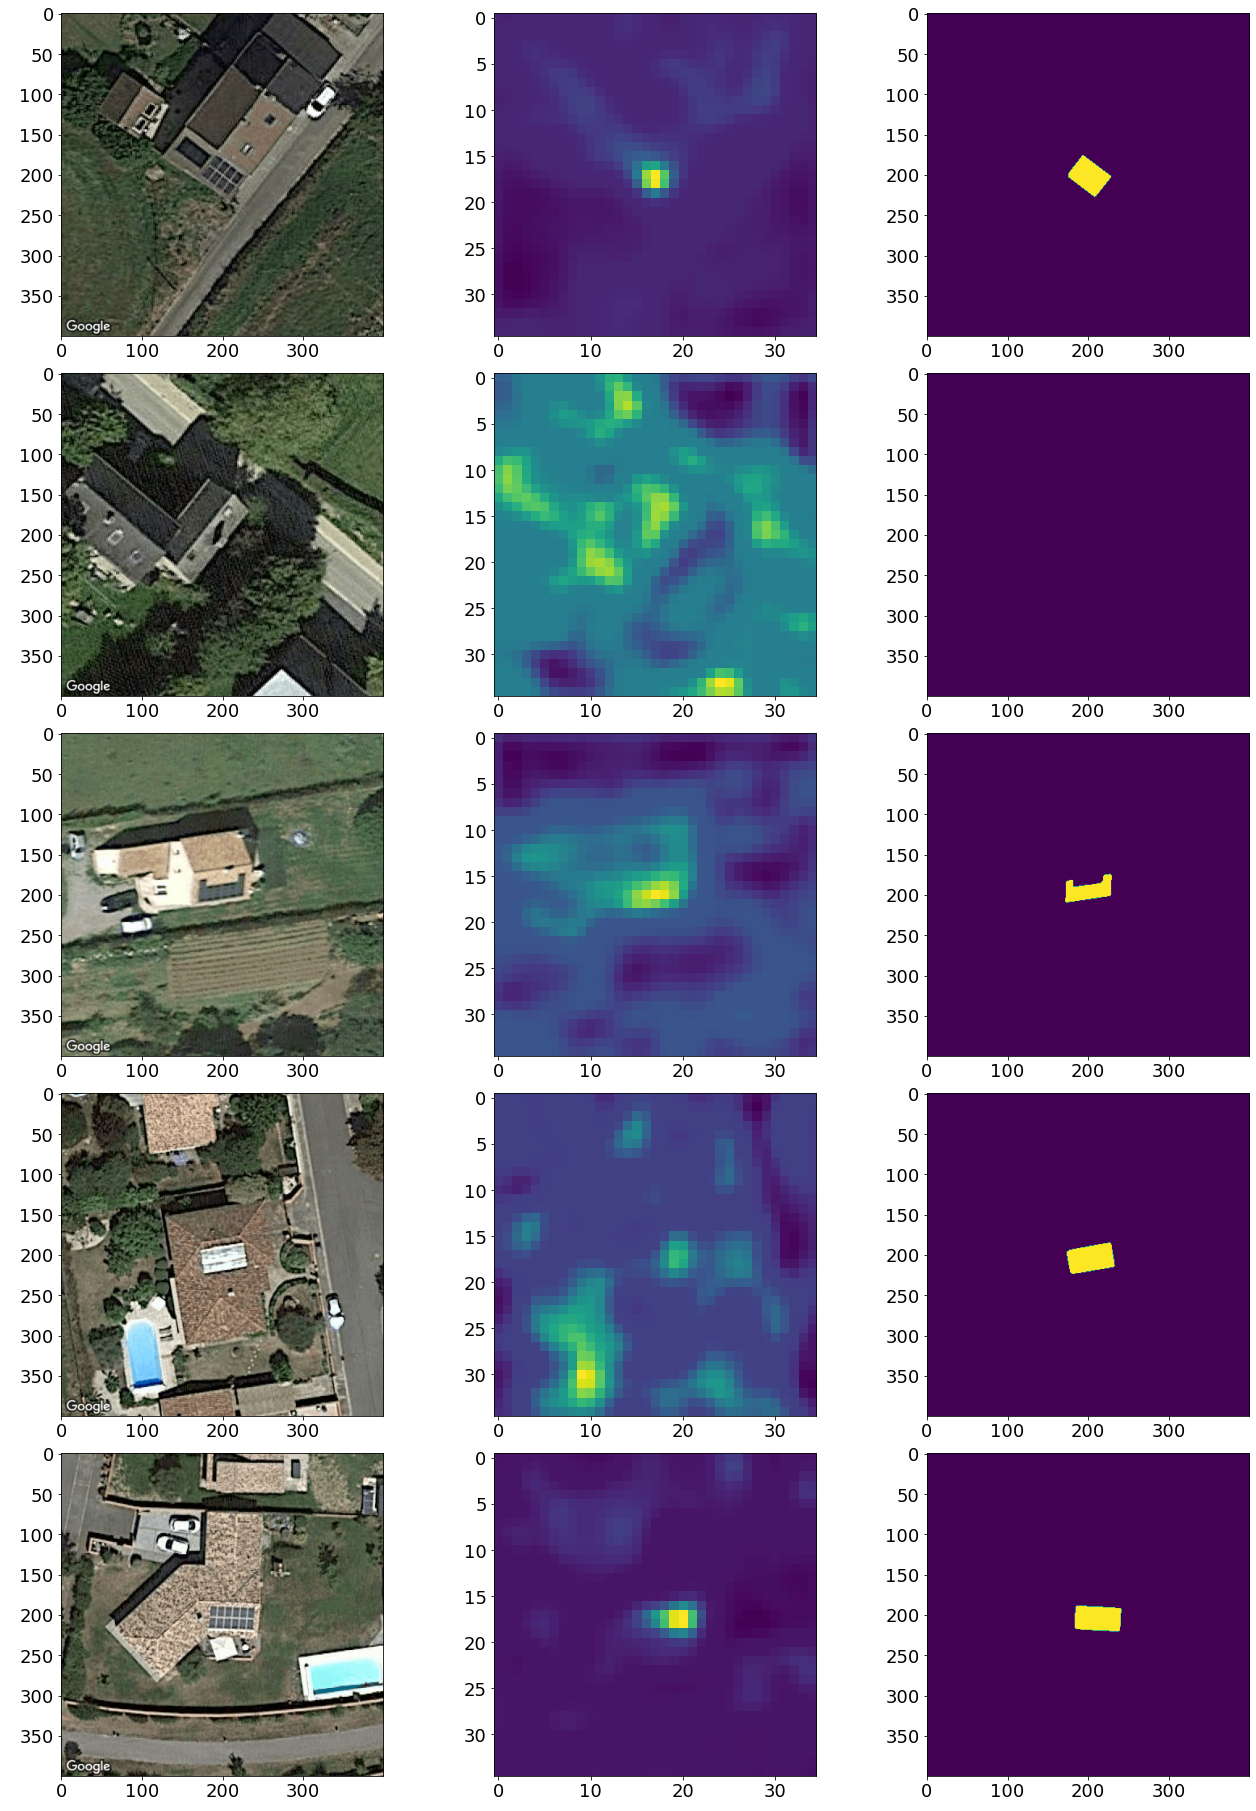

In [296]:
cams = [nonzero_out[-1], nonzero_out[1], nonzero_out[-5], nonzero_out[-100], nonzero_out[-41]]
captions = [
    'good example of simple segmentation',
    'bad example of misclassification',
    'bad example of diffuse prediction',
    'bad example of confusing panel for another element',
    'good example where model was able to distinguish pool from panel'
]
plt.rcParams.update({'font.size': 18})
vertically_stacked(cams, captions, "good_bad_examples")

In [248]:
def find_non_zero_cams(cams):
    non_zero_cams = []
    for cam in cams:
#         print(cam[0].sum())
        if cam[0].sum() != 0:
            print(cam[0])
            plt.imshow(cam[0])
            non_zero_cams.append(cam)
    return non_zero_cams

[[-0.16478512 -0.21810578 -0.22687852 ... -0.19889563 -0.1295205
  -0.11577123]
 [-0.05167941 -0.07588236 -0.0760582  ... -0.17708914 -0.15267724
  -0.141255  ]
 [ 0.          0.          0.         ... -0.10112055 -0.20538749
  -0.23270886]
 ...
 [-0.32241896 -0.23128311 -0.01303646 ...  0.16791546  0.11043477
   0.07062231]
 [-0.28612876 -0.2741369  -0.10775367 ...  0.27367246  0.16837598
   0.0658818 ]
 [-0.22628473 -0.23270357 -0.16700049 ...  0.2704694   0.15873113
   0.0628006 ]]
[[-0.29709113 -0.25835633 -0.09489395 ... -0.6115606  -0.6746423
  -0.5444232 ]
 [-0.36263356 -0.31721538 -0.10930222 ... -0.8501441  -0.9460857
  -0.74317396]
 [-0.3487566  -0.31869864 -0.13811354 ... -0.9577447  -1.0505056
  -0.8062404 ]
 ...
 [ 0.          0.         -0.01343166 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.11383994  0.00329569
   0.        ]
 [ 0.          0.          0.         ...  0.2412138   0.08817723
   0.00817458]]
[[-0.1050359  -0.05537515 -0

[[-2.38366142e-01 -2.54696071e-01 -2.60866046e-01 ...  0.00000000e+00
   0.00000000e+00  1.20196224e-03]
 [-1.50527433e-01 -1.08564787e-01 -8.72664005e-02 ...  4.89028404e-03
   1.92013360e-03  7.52256834e-04]
 [-3.76725718e-02 -1.20994877e-02 -5.41302841e-03 ...  4.83753495e-02
   5.46039827e-03  6.89045643e-04]
 ...
 [ 7.95356114e-04  3.16372402e-02  2.63351500e-01 ...  4.02678311e-01
   6.69018090e-01  5.00395715e-01]
 [ 0.00000000e+00  3.36178322e-03  1.13771096e-01 ...  4.07725632e-01
   8.10334504e-01  6.63641810e-01]
 [ 0.00000000e+00  2.00569979e-03  4.04950082e-02 ...  3.11330020e-01
   5.94893277e-01  5.04562020e-01]]
[[ 0.00000000e+00  4.52211912e-04  8.59255157e-03 ...  6.11267239e-02
   0.00000000e+00 -6.64808154e-02]
 [ 0.00000000e+00  1.46349939e-03  8.34715459e-03 ...  2.01754659e-01
   0.00000000e+00 -1.04736966e-04]
 [ 7.46990135e-03  2.50239093e-02  3.86343151e-02 ...  4.80161041e-01
   3.94937545e-02  0.00000000e+00]
 ...
 [ 1.15686685e-01  1.39461413e-01  1.5319016

[[-0.01820757 -0.01822879 -0.04715326 ... -0.51979023 -0.44949007
  -0.3538437 ]
 [ 0.          0.          0.         ... -0.60648674 -0.51212054
  -0.40047288]
 [ 0.04603205  0.00794321  0.         ... -0.40269494 -0.3166129
  -0.27051812]
 ...
 [ 0.660089    1.0071467   1.0247078  ... -0.94422656 -0.9438991
  -0.6853457 ]
 [ 0.45933783  0.7305217   0.7293818  ... -0.81284904 -0.83027726
  -0.6053518 ]
 [ 0.26327404  0.41167486  0.40062153 ... -0.5142934  -0.5307039
  -0.4115361 ]]
[[-0.51816726 -0.639737   -0.5819008  ...  0.          0.
  -0.00135049]
 [-0.5798276  -0.67484045 -0.5239041  ...  0.          0.
   0.        ]
 [-0.34029    -0.25749686 -0.05987952 ...  0.          0.
   0.        ]
 ...
 [-0.39877796 -0.3414411  -0.0715804  ...  0.29214516  0.00557092
   0.        ]
 [-0.28124902 -0.19675264 -0.0177799  ...  0.1150379   0.
   0.        ]
 [-0.18496242 -0.1145602  -0.00956625 ...  0.02524798  0.
  -0.00186289]]
[[ 1.1362113e-01  2.0969069e-01  3.0616015e-01 ...  2.21251

[[-3.0633703e-01 -3.0589867e-01 -1.9867232e-01 ...  1.6718305e-04
   2.6798056e-02  7.4709289e-02]
 [-2.5135690e-01 -2.2185609e-01 -1.2728110e-01 ...  0.0000000e+00
   2.3609642e-02  7.2359271e-02]
 [-6.6854268e-02 -4.0962886e-02 -4.0372930e-02 ...  0.0000000e+00
   1.2673399e-03  7.5210263e-03]
 ...
 [-3.3441311e-01 -4.5897242e-01 -5.5829191e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-1.9667998e-01 -2.2269683e-01 -2.4206573e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-1.1554958e-01 -8.3631456e-02 -6.2620163e-02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[-0.13861045 -0.20323166 -0.29505453 ...  0.11021933  0.
  -0.0084523 ]
 [-0.15104657 -0.25846663 -0.37374592 ...  0.02012286  0.
  -0.01247729]
 [-0.1753327  -0.26468837 -0.31284145 ...  0.          0.
  -0.03868248]
 ...
 [-0.63825303 -0.74638146 -0.5218756  ...  1.2985314   1.9901758
   1.3332682 ]
 [-0.44195846 -0.52154773 -0.399494   ...  1.4448549   2.1719308
   1.4524317 ]
 [-0.25286627 -0

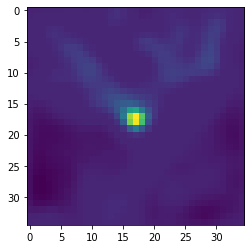

In [125]:
# read pickle file
out = read_from_pickle('data/bdappv-france/CAM_seg0.7.pickle')
nonzero_out = find_non_zero_cams(out)

In [126]:
cam_out = nonzero_out[-1]
filename_img = cam_out[1].split('/')[-1]
filename_mask = filename_img.split('.')[0] + '_true_seg.png'
filename_img

'LZQXT2BABOJUGK.png'

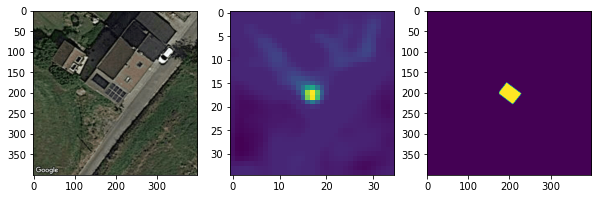

In [127]:
side_by_side_plot(nonzero_out[-1], "good1")

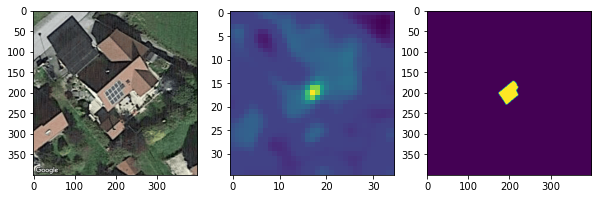

In [56]:
side_by_side_plot(nonzero_out[-2])

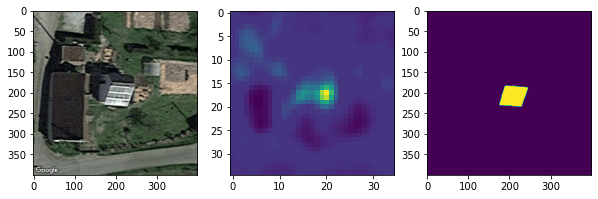

In [57]:
side_by_side_plot(nonzero_out[-3])

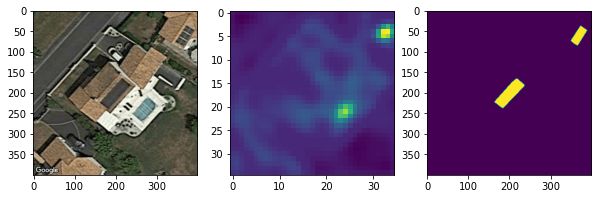

In [58]:
side_by_side_plot(nonzero_out[-4])

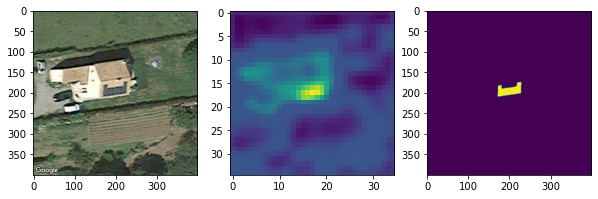

In [128]:
side_by_side_plot(nonzero_out[-5], "diffuse")

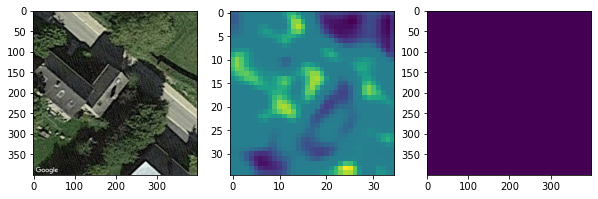

In [175]:
side_by_side_plot(nonzero_out[1], "misclassified")

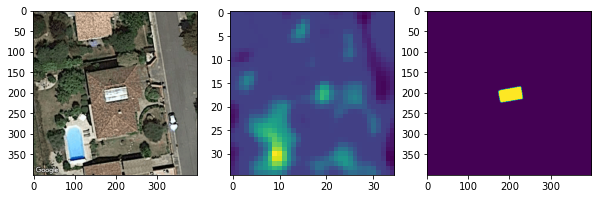

In [179]:
side_by_side_plot(nonzero_out[-100], "pool")

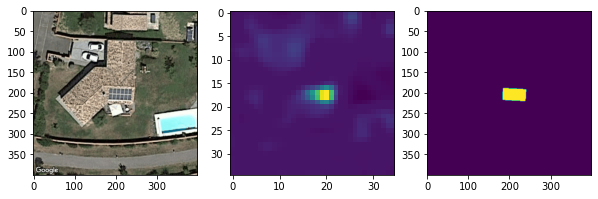

In [188]:
side_by_side_plot(nonzero_out[-41], "good_pool")

In [116]:
x = [
    [0, 100, 500, 1000, 5000],
    [0, 100, 500, 5000]
]
y_acc = [
    [0.57, 0.87, 0.94, 0.97, 0.98],  # reg finetune
    [0.57, 0.87, 0.95, 0.97, 0.97],  # lisa aug
]
y_iou = [
    [0.06, 0.23, 0.48, 0.52, 0.54],  # reg finetune
    [0.06, 0.31, 0.40, 0.10, 0.41],  # lisa aug
]
y_area = [
    [-0.73, 0.10, -0.24, 0.10, -0.02],  # reg finetune
    [-0.73, 0.02, 0.07, -0.04, -0.04],  # lisa aug
]
labels = ['regularized finetune', 'lisa data augmentation']

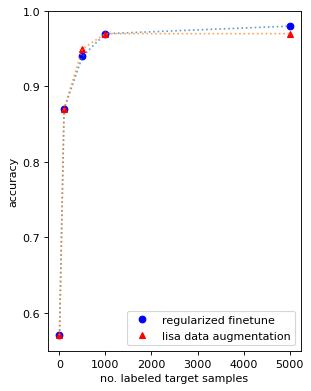

In [108]:
multiseries_scatter_plot(y_acc, labels, "accuracy", "y_acc")

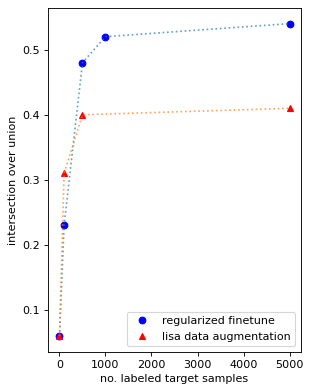

In [117]:
multiseries_scatter_plot(y_iou, labels, "intersection over union", "y_iou")

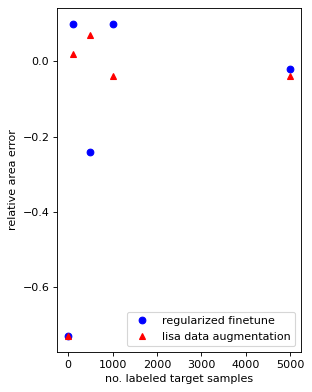

In [119]:
multiseries_scatter_plot(y_area, labels, "relative area error", "y_area")

[[-0.16478512 -0.21810578 -0.22687852 ... -0.19889563 -0.1295205
  -0.11577123]
 [-0.05167941 -0.07588236 -0.0760582  ... -0.17708914 -0.15267724
  -0.141255  ]
 [ 0.          0.          0.         ... -0.10112055 -0.20538749
  -0.23270886]
 ...
 [-0.32241896 -0.23128311 -0.01303646 ...  0.16791546  0.11043477
   0.07062231]
 [-0.28612876 -0.2741369  -0.10775367 ...  0.27367246  0.16837598
   0.0658818 ]
 [-0.22628473 -0.23270357 -0.16700049 ...  0.2704694   0.15873113
   0.0628006 ]]
[[-0.29709113 -0.25835633 -0.09489395 ... -0.6115606  -0.6746423
  -0.5444232 ]
 [-0.36263356 -0.31721538 -0.10930222 ... -0.8501441  -0.9460857
  -0.74317396]
 [-0.3487566  -0.31869864 -0.13811354 ... -0.9577447  -1.0505056
  -0.8062404 ]
 ...
 [ 0.          0.         -0.01343166 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.11383994  0.00329569
   0.        ]
 [ 0.          0.          0.         ...  0.2412138   0.08817723
   0.00817458]]
[[-0.1050359  -0.05537515 -0

[[-0.08853737 -0.04104188 -0.00859414 ... -0.7672633  -0.6912317
  -0.48692116]
 [-0.03114631 -0.01455675 -0.00119536 ... -0.9940996  -0.88277686
  -0.5957484 ]
 [-0.00484219  0.          0.         ... -0.8328855  -0.726573
  -0.49931028]
 ...
 [-0.71358836 -0.89747757 -0.70291173 ...  0.          0.
   0.        ]
 [-0.5361799  -0.6207023  -0.4157015  ...  0.03347241  0.
   0.        ]
 [-0.34326917 -0.35602266 -0.20958957 ...  0.10885023  0.
   0.        ]]
[[1.1271880e-03 5.2869432e-03 1.3704906e-01 ... 1.6835628e-03
  7.9454541e-02 1.5355319e-01]
 [7.8666140e-04 1.6059943e-02 2.5867704e-01 ... 0.0000000e+00
  8.3328150e-03 8.3618946e-02]
 [9.1665927e-03 1.2037684e-01 4.9089581e-01 ... 0.0000000e+00
  0.0000000e+00 1.9179289e-03]
 ...
 [2.2525962e-03 0.0000000e+00 0.0000000e+00 ... 8.3185720e-01
  8.4549528e-01 6.2258357e-01]
 [1.1031397e-02 0.0000000e+00 0.0000000e+00 ... 8.1944418e-01
  8.1616175e-01 5.8671504e-01]
 [4.0344626e-02 7.4178824e-05 0.0000000e+00 ... 6.4024925e-01
  6

[[-1.73407243e-05  0.00000000e+00 -1.45165361e-02 ...  0.00000000e+00
   1.17890257e-03  1.45737976e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -5.28438529e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -2.93336296e-03 -1.04371775e-02]
 [-5.14950324e-03  0.00000000e+00  0.00000000e+00 ... -3.66970734e-03
  -7.25748856e-03 -2.08593197e-02]]
[[-5.9508252e-01 -7.7746499e-01 -8.0667150e-01 ...  1.0312767e-03
   0.0000000e+00 -1.8268124e-04]
 [-8.6893553e-01 -1.1871626e+00 -1.2270982e+00 ...  4.9879039e-03
   0.0000000e+00  0.0000000e+00]
 [-1.0018985e+00 -1.4015505e+00 -1.4421189e+00 ...  3.4147628e-02
   0.0000000e+00  0.0000000e+00]
 ...
 [ 3.4697190e-02  1.4827055e-01  3.2650647e-01 ...  0.0000000e

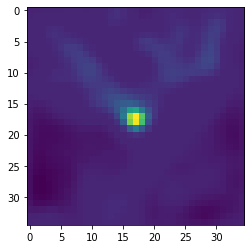

In [5]:
for nz in nonzero_out:
    print(nz[1])

In [18]:
nonzero_out[0][0].shape

(35, 35)

In [27]:
nonzero_out[0][1]

'/home/ubuntu/deepsolar/data/bdappv-france/ft_val/0/NPUHV10B6XKGVI.png'

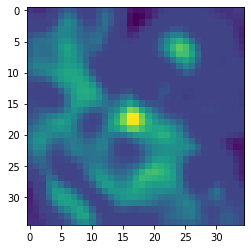

In [19]:
plt.imshow(nonzero_out[0][0])

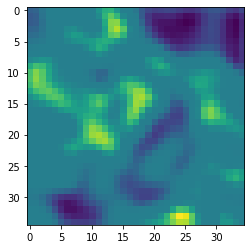

In [21]:
plt.imshow(nonzero_out[1][0])

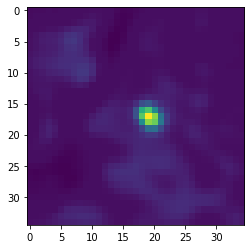

In [22]:
plt.imshow(nonzero_out[2][0])

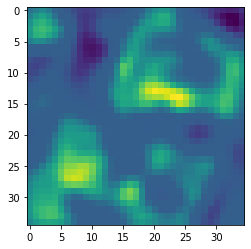

In [24]:
plt.imshow(nonzero_out[3][0])

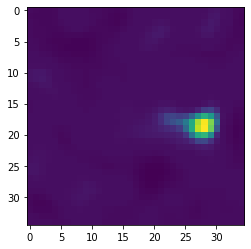

In [25]:
plt.imshow(nonzero_out[4][0])

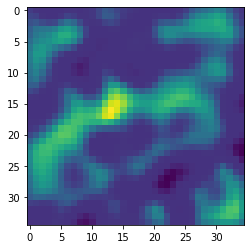

In [26]:
plt.imshow(nonzero_out[5][0])